**This notebook demonstrates how to get paleo-coastlines from GPlates Web Service.**


#### Dependencies

- gplates-ws-proxy
- shapely
- cartopy
- matplotlib
- moviepy

    Use the following commands to create a running environment

    `conda create --name gplates-ws-example -c conda-forge cartopy matplotlib moviepy shapely jupyter requests`
    
    `conda activate gplates-ws-example`
    
    `pip install gplates-ws-proxy`
    
    You may use the environment.yml to create the conda env as well.

    `conda env create -f environment.yml `



In [1]:
from pathlib import Path
import json, os
import shapely
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon
from shapely.geometry import shape
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import gplates_ws_proxy

#os.environ['GWS_URL']='http://localhost:18000'
os.environ['GWS_URL']='https://gws.gplates.org'

OUTPUT_PATH="output/coastlines"

def plot_paleo_map(paleo_age, show=True, save=False):
    #get coastlines
    model= gplates_ws_proxy.PlateModel('Muller2022')
    coastlines=model.get_coastlines(paleo_age, format="shapely", min_area=500)

    # plot the map
    crs = ccrs.Orthographic(central_longitude=115, central_latitude=-34)
    #crs = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    #crs = ccrs.Mollweide()
    
    fig = plt.figure(figsize=(12, 6), dpi=120, frameon=False)
    ax = plt.axes(projection=crs)
    ax.gridlines()
    ax.set_global()

    #plot coastlines
    shape_feature = ShapelyFeature(coastlines, ccrs.PlateCarree(), facecolor="lime", edgecolor='none',alpha=1, lw=0, zorder=1)
    ax.add_feature(shape_feature)

    
    plt.title(f"{paleo_age} Ma", loc='left', y=0.95)
    if show:
        plt.show()
        
    if save:
        Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
        fig.savefig(
            f"{OUTPUT_PATH}/coastlines_{paleo_age}_Ma.png",
            format="png",
            bbox_inches="tight",
            dpi=96,
            #transparent=True,
            #pad_inches=0
        )
        plt.close()
        

plot coastlines in Orthographic projection. test cell for creating animation code beow

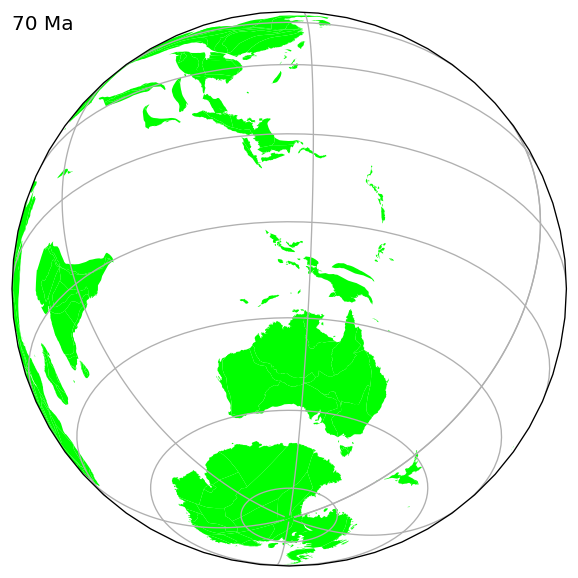

In [2]:
plot_paleo_map(70, show=True, save=True)

create a sequence of images. This cell might take long time to run.

In [3]:
import time

for age in range(0,101,10):
    print(age)
    plot_paleo_map(age,save=True, show=False)
    time.sleep(1)

0
10
20
30
40
50
60
70
80
90
100


cell to create a mp4 from a sequence of images

In [4]:
%%capture --no-stdout

#pip install moviepy
#create the mp4 video
import moviepy.editor as mpy
from pathlib import Path

frame_list = [f"{OUTPUT_PATH}/coastlines_{age}_Ma.png" for age in range(0,101,10)]
frame_list.reverse()
#print(frame_list)
clip = mpy.ImageSequenceClip(frame_list, fps=12)

clip.write_videofile( f'{OUTPUT_PATH}/coastlines.mp4',
                          codec="libx264",
                          #audio_codec='aac',
                          ffmpeg_params=[ "-s", "462x462", "-pix_fmt", "yuv420p"]) #LOOK HERE!!!! give image size here(the numbers must divide by 2)
print('video has been created!')

Moviepy - Building video output/coastlines/coastlines.mp4.
Moviepy - Writing video output/coastlines/coastlines.mp4

Moviepy - Done !
Moviepy - video ready output/coastlines/coastlines.mp4
video has been created!


play the newly created videeo

In [5]:
from IPython.display import Video

#display the mp4 video
Video(f'{OUTPUT_PATH}/coastlines.mp4',width=600, embed=True)

demo get coastline map image from gplates proxy

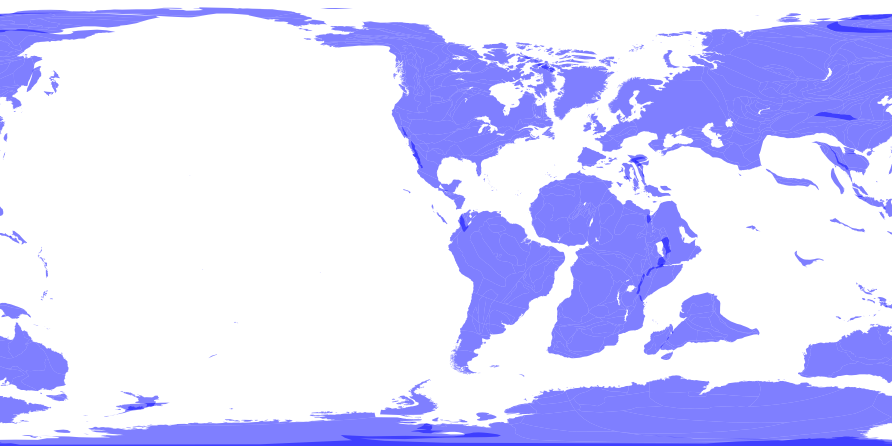

In [6]:
from IPython.display import Image, display
coastlines_png=gplates_ws_proxy.get_paleo_coastlines(
    110, format="png", extent=(-180,180,-90,90), 
    facecolor='blue',central_meridian=-60)
display(Image(coastlines_png))

get coastlines as shapely objects and plot them with Cartopy

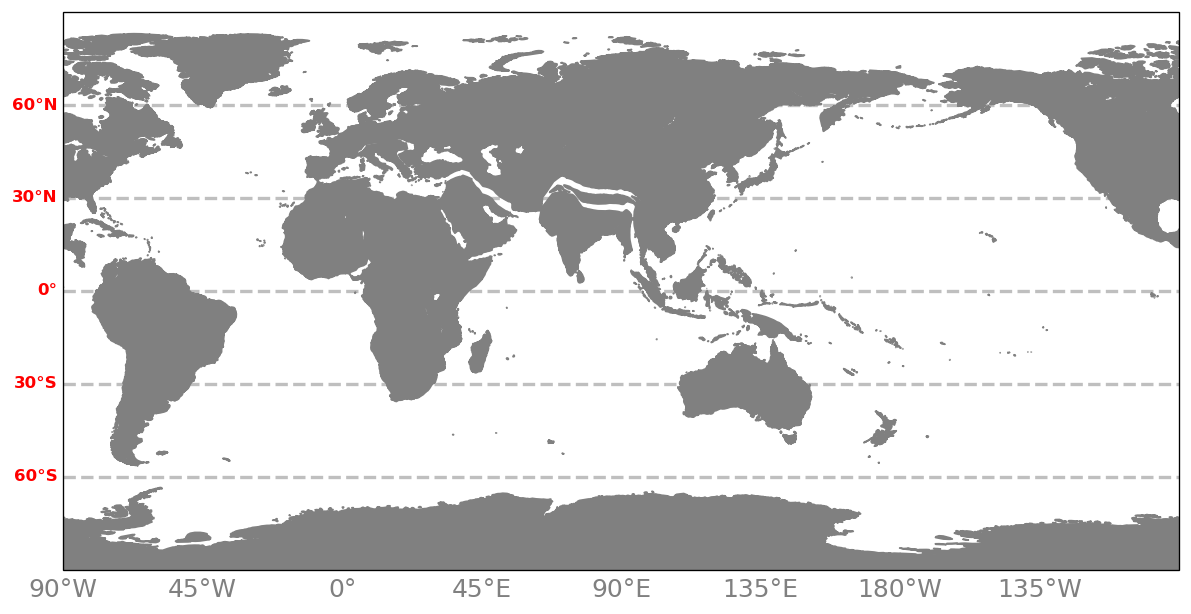

In [7]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#get coastlines
coastlines=gplates_ws_proxy.get_paleo_coastlines(10, format="shapely")

# plot the map
crs = ccrs.PlateCarree(central_longitude=90.0, globe=None)

fig = plt.figure(figsize=(12, 8), dpi=120, frameon=False)
ax = plt.axes(projection=crs)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180,-135,-90, -45, 0, 45, 90,135,180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}

ax.set_global()

#plot coastlines
shape_feature = ShapelyFeature(coastlines, ccrs.PlateCarree(), 
                               facecolor="grey", edgecolor='grey', lw=1, zorder=1)
ax.add_feature(shape_feature)

plt.show()    